# Titanic - Machine Learning from Disaster
This project is based on the Titanic dataset from Kaggle, a classic machine learning competition. The goal is to predict which passengers survived the Titanic shipwreck using machine learning models.

## Key Features:
- Exploratory Data Analysis (EDA): Insights from the Titanic dataset through visualization and statistics.
- Data Preprocessing: Handling missing data, feature engineering, and scaling.
- Model Implementation: Evaluation of several machine learning models like Logistic Regression, Random Forest, and more.
- Hyperparameter Tuning: Improving model performance with fine-tuned parameters.
- Results Visualization: Confusion matrix, feature importance, and accuracy scores.

In [1]:
import pandas as pd


In [3]:
import numpy as np

In [35]:
train_data=pd.read_csv("/Users/ajaykumar/Downloads/titanic/train.csv")

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [43]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
age_mean=train_data["Age"].mean()

In [49]:
print(age_mean)

29.69911764705882


In [59]:
df_train=train_data.copy()

# Fill missing values in the "Age" column
df_train["Age"] = df_train["Age"].fillna(age_mean)


In [63]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 158 entries, PassengerId to Ticket_Encoded
dtypes: bool(148), float64(2), int64(6), object(2)
memory usage: 198.5+ KB


In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [71]:
df_train = pd.get_dummies(df_train, columns=["Cabin","Embarked"], drop_first=True)

In [73]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,False,False,False,False,False,False,False,False,False,False


In [79]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
              ..
Cabin_F4       0
Cabin_G6       0
Cabin_T        0
Embarked_Q     0
Embarked_S     0
Length: 158, dtype: int64

In [91]:
df_train["Ticket"].nunique()

681

In [93]:
frequency_encoding = df_train['Ticket'].value_counts()

In [95]:
df_train['Ticket_Encoded'] = df_train['Ticket'].map(frequency_encoding)

In [97]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,True,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,True,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,False,False,False,False,False,False,False,False,True,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,True,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,False,False,False,False,False,False,False,False,False,1


In [99]:
df_train.drop('Ticket', axis=1, inplace=True)

In [101]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,False,...,False,False,False,False,False,False,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,False,...,False,False,False,False,False,False,False,False,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,False,...,False,False,False,False,False,False,False,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,False,...,False,False,False,False,False,False,False,False,True,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,False,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,False,...,False,False,False,False,False,False,False,False,True,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,False,...,False,False,False,False,False,False,False,False,True,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,False,...,False,False,False,False,False,False,False,False,True,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,False,...,False,False,False,False,False,False,False,False,False,1


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 158 entries, PassengerId to Ticket_Encoded
dtypes: bool(148), float64(2), int64(6), object(2)
memory usage: 198.5+ KB


In [113]:
df_train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
                   ...  
Cabin_G6            bool
Cabin_T             bool
Embarked_Q          bool
Embarked_S          bool
Ticket_Encoded     int64
Length: 158, dtype: object

In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Sex_Encoded'] = label_encoder.fit_transform(df_train['Sex'])


In [121]:
df_train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
                   ...  
Cabin_T             bool
Embarked_Q          bool
Embarked_S          bool
Ticket_Encoded     int64
Sex_Encoded        int64
Length: 159, dtype: object

In [123]:
df_train.drop('Sex',axis=1,inplace=True)

In [125]:
df_train.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Age               float64
                   ...   
Cabin_T              bool
Embarked_Q           bool
Embarked_S           bool
Ticket_Encoded      int64
Sex_Encoded         int64
Length: 158, dtype: object

In [127]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 158 entries, PassengerId to Sex_Encoded
dtypes: bool(148), float64(2), int64(7), object(1)
memory usage: 198.5+ KB


In [131]:
df_train['Title'] = df_train['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)


In [133]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,False,False,...,False,False,False,False,False,False,True,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,False,False,...,False,False,False,False,False,False,True,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,False,False,...,False,False,False,False,False,False,True,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,False,False,...,False,False,False,False,False,False,True,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,False,False,...,False,False,False,False,False,False,True,1,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,True,1,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,False,False,...,False,False,False,False,False,False,True,2,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,1,1,Mr


In [135]:
title_freq = df_train['Title'].value_counts()

# Map the frequency of each title to the 'Title' column
df_train['Title_Encoded'] = df_train['Title'].map(title_freq)


In [137]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title,Title_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,False,False,...,False,False,False,False,False,True,1,1,Mr,517
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,False,False,...,False,False,False,False,False,False,1,0,Mrs,125
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,False,False,...,False,False,False,False,False,True,1,0,Miss,182
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,False,False,...,False,False,False,False,False,True,2,0,Mrs,125
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,False,False,...,False,False,False,False,False,True,1,1,Mr,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,False,False,...,False,False,False,False,False,True,1,1,Rev,6
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,False,False,...,False,False,False,False,False,True,1,0,Miss,182
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,False,False,...,False,False,False,False,False,True,2,0,Miss,182
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,1,1,Mr,517


In [141]:
df_train.drop('Title',axis=1,inplace=True)

In [143]:
df_train.drop('Name',axis=1,inplace=True)

In [145]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title_Encoded
0,1,0,3,22.000000,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,True,1,1,517
1,2,1,1,38.000000,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,1,0,125
2,3,1,3,26.000000,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,True,1,0,182
3,4,1,1,35.000000,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,True,2,0,125
4,5,0,3,35.000000,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,True,1,1,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,False,False,False,...,False,False,False,False,False,False,True,1,1,6
887,888,1,1,19.000000,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,True,1,0,182
888,889,0,3,29.699118,1,2,23.4500,False,False,False,...,False,False,False,False,False,False,True,2,0,182
889,890,1,1,26.000000,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,1,1,517


In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 158 entries, PassengerId to Title_Encoded
dtypes: bool(148), float64(2), int64(8)
memory usage: 198.5 KB


In [157]:
import seaborn as sns
for col in df_train.select_dtypes(include='object').columns:
    sns.countplot(y=data[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

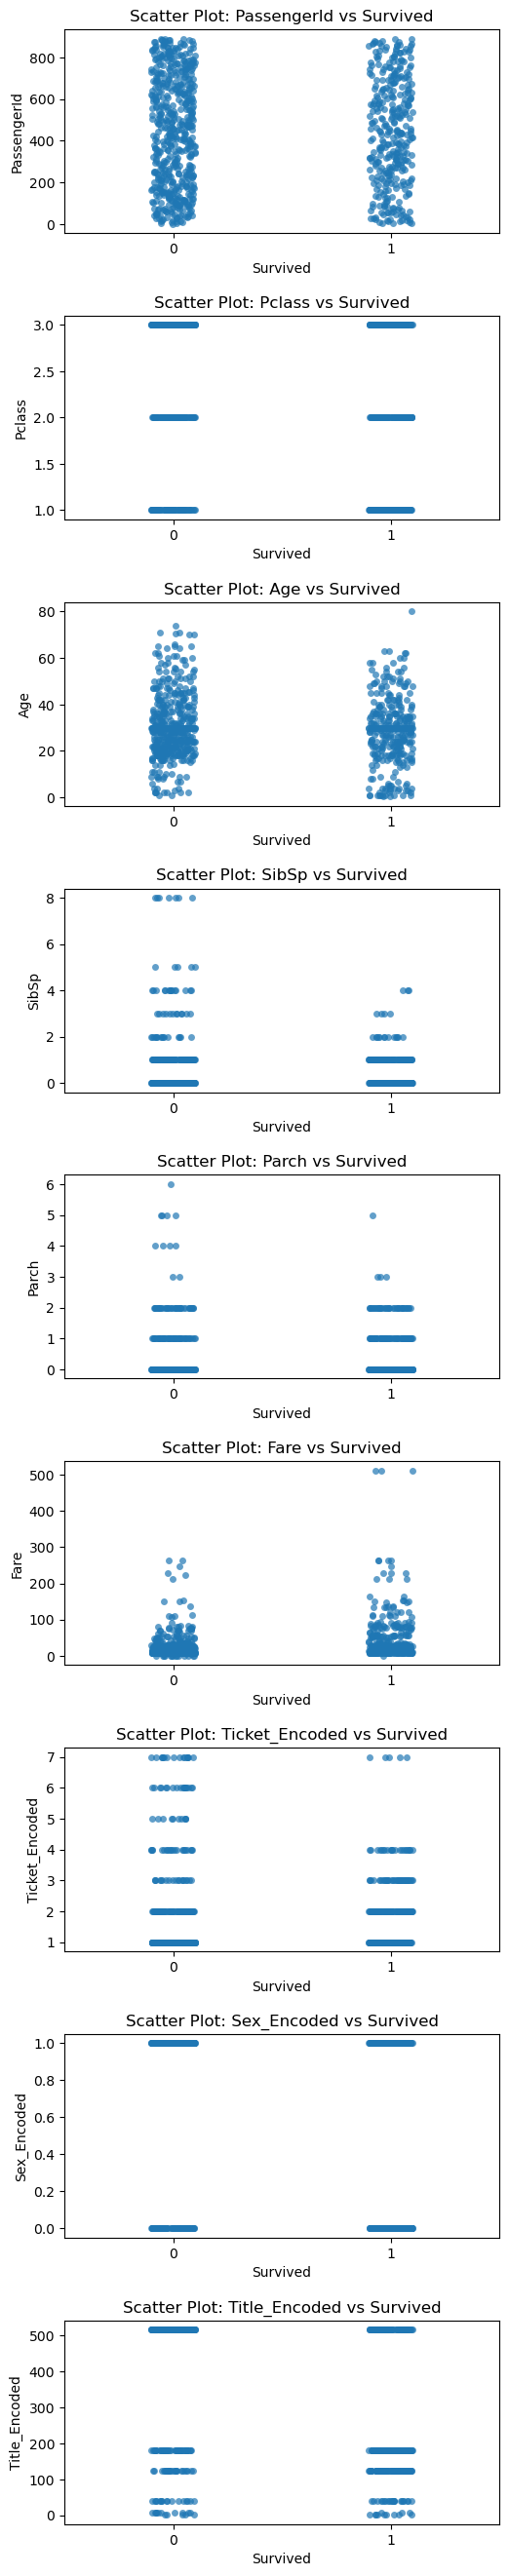

In [161]:
import matplotlib.pyplot as plt

# Numerical Features
numerical_cols = df_train.select_dtypes(include='number').columns.drop('Survived')
# Plotting Numerical Features vs. Survived
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(6, len(numerical_cols) * 3))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numerical_cols):
    sns.stripplot(ax=axes[i], x='Survived', y=col, data=df_train, jitter=True, alpha=0.7)
    axes[i].set_title(f'Scatter Plot: {col} vs Survived')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Survived')

plt.show()

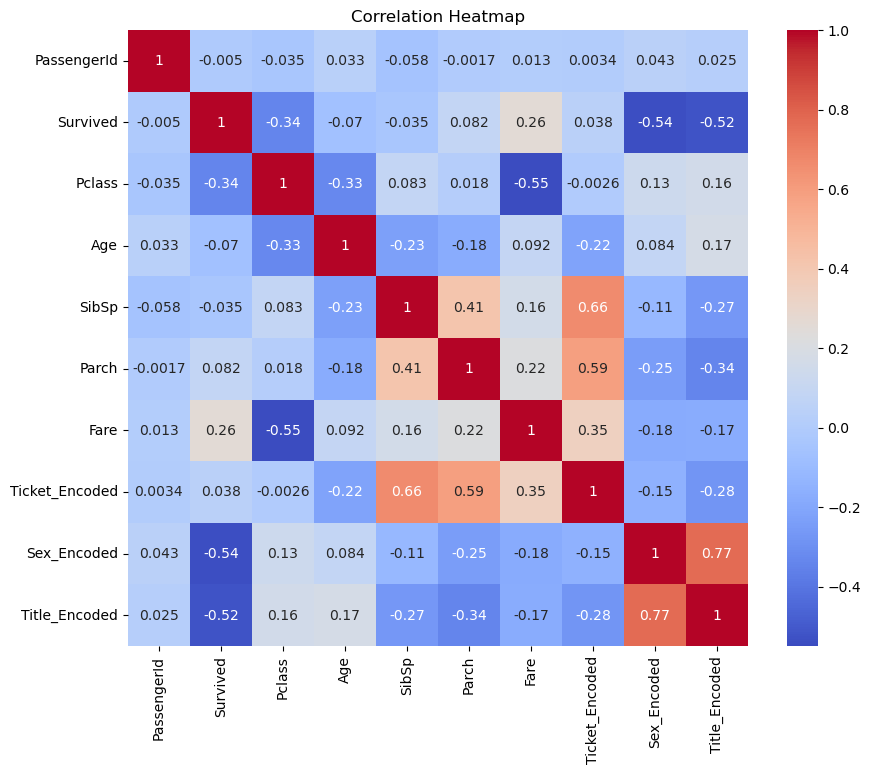

In [167]:
correlation_matrix = df_train.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [169]:
from sklearn.model_selection import train_test_split

# Separate features and target variable from the training data
X = df_train.drop('Survived', axis=1)  # Replace 'Survived' with your target column name
y = df_train['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train Shape:", X_train.shape)
print("X_val Shape:", X_val.shape)


X_train Shape: (712, 157)
X_val Shape: (179, 157)


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.8268156424581006


In [173]:
test_data=pd.read_csv("/Users/ajaykumar/Downloads/titanic/test.csv")

In [175]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [177]:
age_mean=train_data["Age"].mean()

In [181]:
df_test=test_data.copy()

# Fill missing values in the "Age" column
df_test["Age"] = df_test["Age"].fillna(age_mean)

In [183]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
df_test = pd.get_dummies(df_test, columns=["Cabin","Embarked"], drop_first=True)

In [250]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title_Encoded
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,False,0,False,False,0,False,True,1,1,240
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72


In [189]:
frequency_encoding = df_test['Ticket'].value_counts()

In [252]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title_Encoded
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,False,0,False,False,0,False,True,1,1,240
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72


In [191]:
df_test['Ticket_Encoded'] = df_test['Ticket'].map(frequency_encoding)

In [193]:
df_test.drop('Ticket', axis=1, inplace=True)

In [197]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['Sex_Encoded'] = label_encoder.fit_transform(df_test['Sex'])

In [254]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Ticket_Encoded,Sex_Encoded,Title_Encoded
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,False,0,False,False,0,True,False,1,1,240
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,False,0,False,False,0,False,True,1,1,240
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,False,0,False,False,0,False,True,1,0,72


In [201]:
df_test.drop('Sex',axis=1,inplace=True)

In [203]:
df_test['Title'] = df_test['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [205]:
title_freq = df_test['Title'].value_counts()

# Map the frequency of each title to the 'Title' column
df_test['Title_Encoded'] = df_test['Title'].map(title_freq)


In [207]:
df_test.drop('Title',axis=1,inplace=True)

In [209]:
df_test.isna().sum()

PassengerId       0
Pclass            0
Name              0
Age               0
SibSp             0
                 ..
Embarked_Q        0
Embarked_S        0
Ticket_Encoded    0
Sex_Encoded       0
Title_Encoded     0
Length: 87, dtype: int64

In [211]:
df_test.drop('Name',axis=1,inplace=True)

In [227]:
# Align test data columns with training data columns
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


In [229]:
# Identify extra columns in test data
extra_columns = set(df_test.columns) - set(df_train.columns)
print(f"Extra columns in test: {extra_columns}")

# Drop extra columns
df_test = df_test.drop(columns=extra_columns)


Extra columns in test: set()


In [231]:
# Identify missing columns in test data
missing_columns = set(df_train.columns) - set(df_test.columns)
print(f"Missing columns in test: {missing_columns}")

# Add missing columns with default value
for col in missing_columns:
    df_test[col] = 0


Missing columns in test: set()


In [235]:
# Drop the 'Survived' column from the test dataset if it exists
if 'Survived' in df_test.columns:
    df_test = df_test.drop(columns=['Survived'])


In [237]:
# Ensure the test data is preprocessed similarly to the training data
predictions = model.predict(df_test)

# Save predictions to a CSV
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)


In [241]:
sub_data=pd.read_csv("/Users/ajaykumar/Downloads/submission.csv")
sub_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
